---

## BCA Assay :




In [2]:
# Importing library + palette

import os
import scipy
from scipy import io
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn.metrics import r2_score
from scipy.optimize import newton
from scipy.optimize import root_scalar

# Adobe Colors in Hex Valentine colorblind friendly palette
colors = {
    "Color 1": "#016FEB",  # Bright Blue
    "Color 2": "#00326A",  # Deep Navy Blue
    "Color 3": "#749AFF",  # Light Sky Blue
    "Color 4": "#9AA5D8",  # Soft Lavender Blue
    "Color 5": "#827742",  # Olive Brown
    "Color 6": "#463F0F"   # Dark Olive Green
}

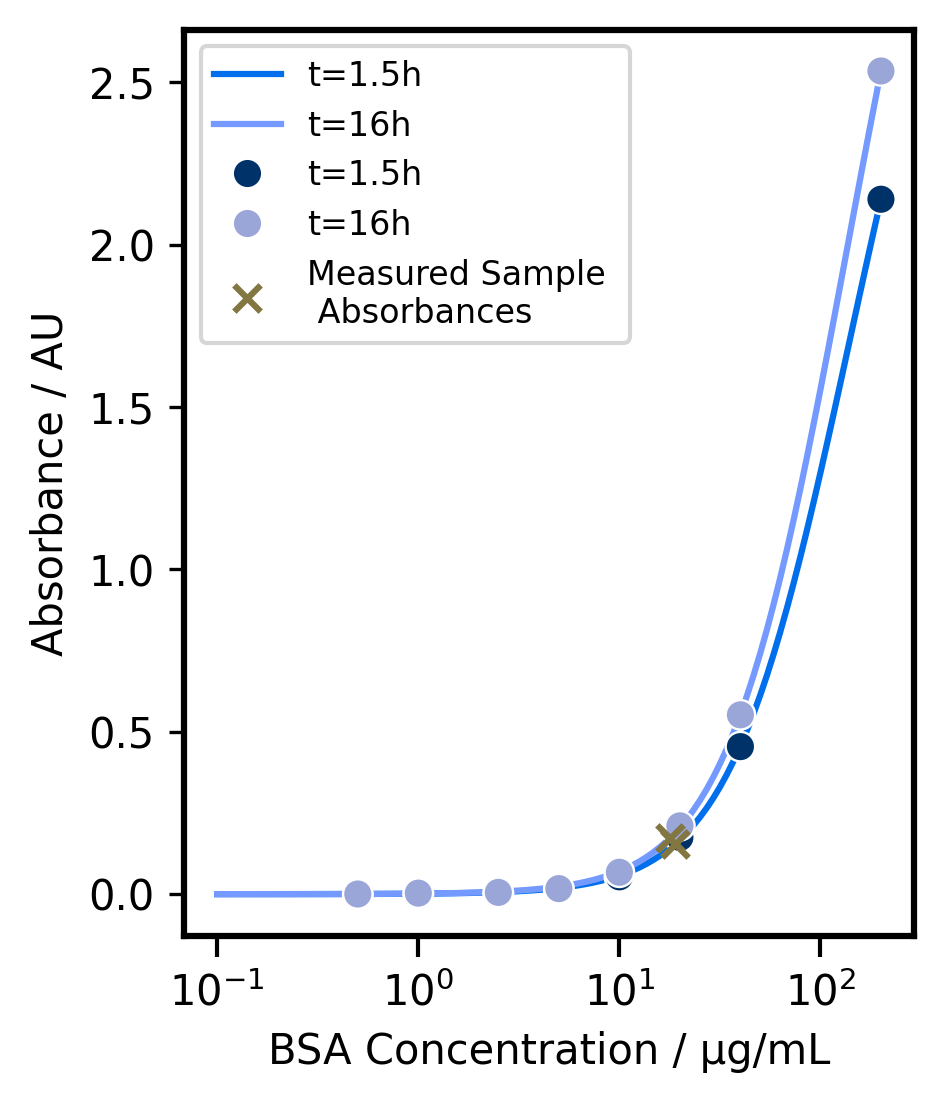

In [3]:
# Input data for absorbance
Corrected_Absorbance_A = np.array([2.0868, 0.453, 0.1738, 0.0537, 0.0058, 0.0027, -0.0001, -0.002, -0.0036])
Corrected_Absorbance_B = np.array([2.1767, 0.4686, 0.1718, 0.0621, 0.0208, -0.0012, -0.0006, -0.0053, -0.0029])
Corrected_Absorbance_C = np.array([2.1575, 0.4414, 0.1783, 0.044, 0.0129, 0.0024, 0.0014, -0.0025, 0.0066])

# Calculate the average corrected absorbance for Plate 1
Corrected_Absorbance_Avg = np.mean([Corrected_Absorbance_A, Corrected_Absorbance_B, Corrected_Absorbance_C], axis=0)

Corrected_Absorbance_A2 = np.array([2.4984, 0.5478, 0.2125, 0.0678, 0.0094, 0.0127, 0.0034, 0.0002, -0.0029])
Corrected_Absorbance_B2 = np.array([2.562, 0.5693, 0.2026, 0.0781, 0.0252, 0.0018, 0.0028, -0.0039, -0.0033])
Corrected_Absorbance_C2 = np.array([2.5459, 0.5398, 0.2158, 0.0562, 0.0164, 0.0017, 0.0031, 0.005, 0.0063])

# Calculate the average corrected absorbance for Plate 2
Corrected_Absorbance_Avg2 = np.mean([Corrected_Absorbance_A2, Corrected_Absorbance_B2, Corrected_Absorbance_C2], axis=0)

# Define the sigmoid fitting function
def Y(X, A, B, C, D, E):
    return (A - D) / (1 + (X / C) ** B) ** E + D

# Define concentrations
conc = np.array([200, 40, 20, 10, 5, 2.5, 1, 0.5, 0])

# Fit the curves for Plate 1
initial_guess = [10, 1, 50, 1, 1]
bounds = ([0, 0.1, 0.1, 0.1, 0.448], [100, 5, 200, 15, 5])
popt, _ = curve_fit(Y, conc, Corrected_Absorbance_Avg, p0=initial_guess, bounds=bounds, maxfev=5000)
X = np.logspace(-1, np.log10(200), 100)
fitted_Y = Y(X, *popt)

# Fit the curves for Plate 2
popt2, _ = curve_fit(Y, conc, Corrected_Absorbance_Avg2, p0=initial_guess, bounds=bounds, maxfev=5000)
fitted_Y2 = Y(X, *popt2)

# Prepare data for plotting
data1 = pd.DataFrame({"Concentration": conc, "Corrected Absorbance": Corrected_Absorbance_Avg, "Time": "t=1.5h"})
data2 = pd.DataFrame({"Concentration": conc, "Corrected Absorbance": Corrected_Absorbance_Avg2, "Time": "t=16h"})
fitted_data1 = pd.DataFrame({"Concentration": X, "Fitted Absorbance": fitted_Y, "Time": "t=1.5h"})
fitted_data2 = pd.DataFrame({"Concentration": X, "Fitted Absorbance": fitted_Y2, "Time": "t=16h"})

# Combine scatter and fitted data
scatter_data = pd.concat([data1, data2], ignore_index=True)
fitted_data = pd.concat([fitted_data1, fitted_data2], ignore_index=True)

# Add two new points
extra_conc = [18.86501258, 17.80196721]
extra_absorbance = [0.1539, 0.17206666666667]

# Plot the data
plt.figure(figsize=(3.14, 3.925), dpi=300)

# Plot fitted curves
sns.lineplot(data=fitted_data, x="Concentration", y="Fitted Absorbance", hue="Time", palette=[colors["Color 1"], colors["Color 3"]], legend=True, zorder=1)

# Plot scatter points
sns.scatterplot(data=scatter_data, x="Concentration", y="Corrected Absorbance", hue="Time", palette=[colors["Color 2"], colors["Color 4"]], s=50, zorder=2)

# Add new points
plt.scatter(extra_conc, extra_absorbance, color=colors["Color 5"], s=40, marker='x', label="Measured Sample \n Absorbances", zorder=3)

# Set log scale for x-axis
plt.xscale('log')

# Set only major ticks where 10^x occurs
plt.xticks([0.1, 1, 10, 100], labels=[r"$10^{-1}$",r"$10^{0}$", r"$10^{1}$", r"$10^{2}$"])

# Disable minor ticks
plt.tick_params(axis='x', which='minor', bottom=False)

# Customize major ticks
plt.tick_params(axis='x', which='major', length=5, width=1.5, direction='out', color='black')

# Customize the plot
plt.xlabel("BSA Concentration / μg/mL")
plt.ylabel("Absorbance / AU")
plt.legend(fontsize=8)

# Add box around the axes
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

plt.tick_params(axis='x', which='both', length=5, width=1, direction='out', color='black')

# Show the plot
plt.show()

In [4]:
# t = 1.5h
# Calculating the R-squared
fitted_Y_python = Y(conc, *popt)
r2_python = r2_score(Corrected_Absorbance_Avg, fitted_Y_python)

# Print optimized parameters
optimized_parameters = {
    "A": popt[0],
    "B": popt[1],
    "C": popt[2],
    "D": popt[3],
    "E": popt[4],
    "R-squared":r2_python
}

print("Python Optimized Parameters:")
for param, value in optimized_parameters.items():
    print(f"{param}: {value}")

# Finding the concentration with the sample's absorbance
mean_abs = np.mean([0.1491,0.1458,0.1668])

A = popt[0]
B = popt[1]
C = popt[2]
D = popt[3]
E = popt[4]

def equation_to_solve(X):
    return Y(X, A, B, C, D, E) - mean_abs

# Initial guess for the concentration (important for the solver)
initial_guess = np.array([1])  # Start with a reasonable guess

try:
    concentration1 = fsolve(equation_to_solve, initial_guess)
    print(f"Concentration for absorbance {mean_abs}: {concentration1}")

except RuntimeError as e:
    print(f"Error finding concentration: {e}")

Python Optimized Parameters:
A: 5.274800212703526e-184
B: 1.616225303360979
C: 85.21580074507806
D: 4.176563110272577
E: 0.44800000000014023
R-squared: 0.9999656047001293
Concentration for absorbance 0.1539: [18.86501258]


In [5]:
# t = 16h

fitted_Y2_for_r2 = Y(conc, *popt2)
r2_python2 = r2_score(Corrected_Absorbance_Avg2, fitted_Y2_for_r2)

# Print optimized parameters
optimized_parameters2 = {
    "A": popt2[0],
    "B": popt2[1],
    "C": popt2[2],
    "D": popt2[3],
    "E": popt2[4],
    "R-squared":r2_python2
}

print("Python Optimized Parameters:")
for param, value in optimized_parameters2.items():
    print(f"{param}: {value}")

# Finding the concentration with the sample's absorbance

mean_abs2 = np.mean([0.1682, 0.161, 0.187])

A2 = popt2[0]
B2 = popt2[1]
C2 = popt2[2]
D2 = popt2[3]
E2 = popt2[4]

def equation_to_solve2(X):
    return Y(X, A2, B2, C2, D2, E2) - mean_abs2

# Initial guess for the concentration (important for the solver)
initial_guess = np.array([1])  # Start with a reasonable guess

try:
    concentration12 = fsolve(equation_to_solve2, initial_guess)
    print(f"Concentration for absorbance {mean_abs2}: {concentration12}")

except RuntimeError as e:
    print(f"Error finding concentration: {e}")

Python Optimized Parameters:
A: 2.9690485827499414e-221
B: 1.615601320011345
C: 82.69338946097406
D: 4.868307714166845
E: 0.44800000009887697
R-squared: 0.9999852675719946
Concentration for absorbance 0.17206666666666667: [17.80196721]


---

## ELISA :


<ipython-input-11-1bad979d2e10>:18: RuntimeWarning: invalid value encountered in power
  return (A - D) / (1 + (X / C) ** B) ** E + D


R^2 for NHS Fit: 0.999995
R^2 for IGG Fit: 0.999971


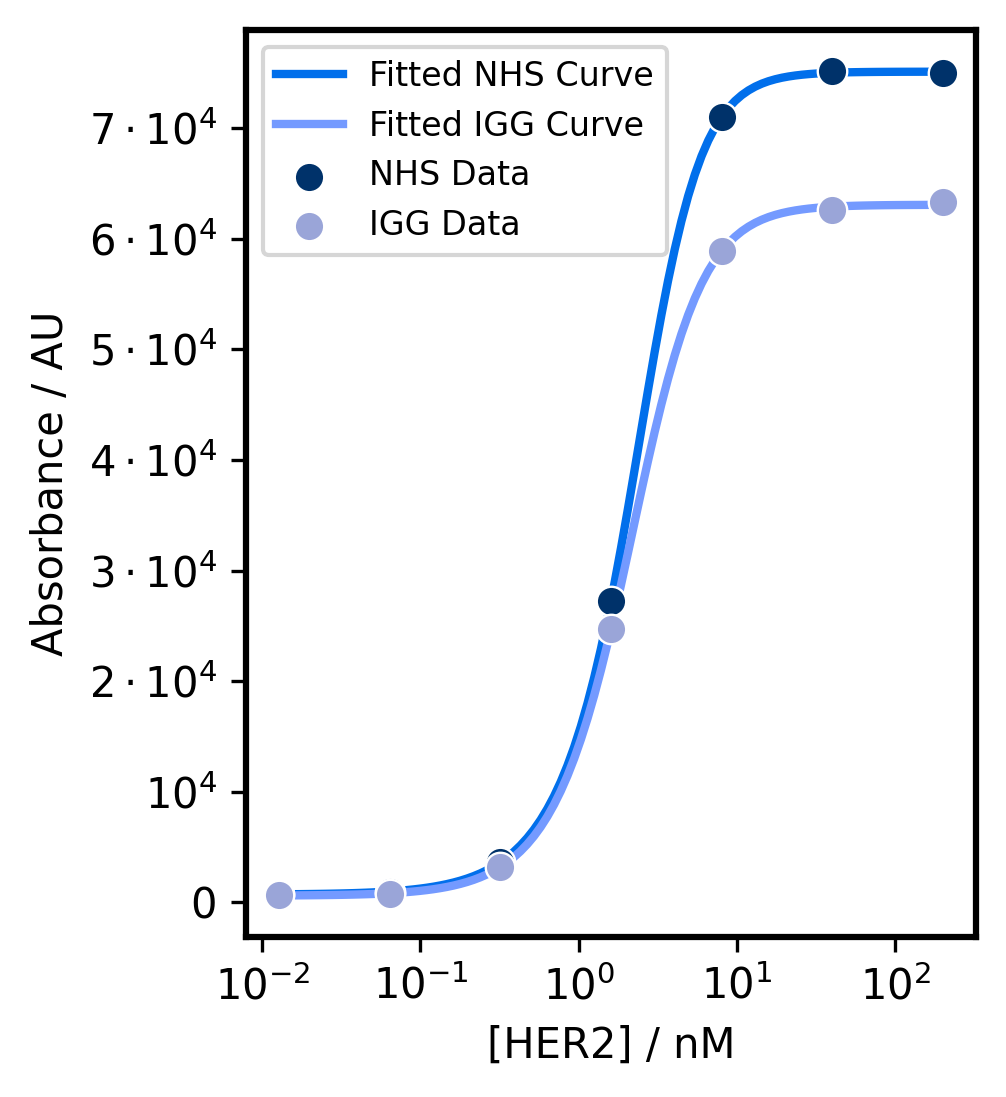

In [11]:
# Input data for NHS
D = np.array([912, 74720, 72826, 64830, 26238, 3941, 1475, 1275, 1274, 543])
E = np.array([922, 75542, 76491, 76396, 29059, 4966, 1548, 1319, 1301, 553])
F = np.array([919, 76302, 77782, 73457, 28157, 3621, 1530, 1290, 1219, 563])

D -= D[-1]
E -= E[-1]
F -= F[-1]
NHS_AVG = np.mean([D[1:-1], E[1:-1], F[1:-1]], axis=0)

CONC_HER2 = np.array([200, 40, 8, 1.6, 0.32, 0.064, 0.0128, 0])
valid_indices = CONC_HER2 > 0
log_CONC_HER2 = np.log10(CONC_HER2[valid_indices])
NHS_AVG_valid = NHS_AVG[valid_indices]

# Curve fitting function
def sigmoid(X, A, B, C, D, E):
    return (A - D) / (1 + (X / C) ** B) ** E + D

# Fit NHS curve
initial_guess = [100000, 1, 1, 1000, 1]
paramsNHS, _ = curve_fit(sigmoid, 10**log_CONC_HER2, NHS_AVG_valid, p0=initial_guess)

# Generate NHS fit data
X_fit = np.logspace(np.log10(min(CONC_HER2[valid_indices])), np.log10(max(CONC_HER2[valid_indices])), 100)
Y_fit_NHS = sigmoid(X_fit, *paramsNHS)

# Input data for IGG
G = np.array([895, 63500, 62315, 58920, 24638, 3715, 1305, 1205, 1200, 540])
H = np.array([902, 64342, 63500, 62190, 27000, 4820, 1450, 1220, 1180, 550])
I = np.array([890, 64250, 64000, 60010, 25900, 3800, 1330, 1210, 1160, 560])

G_corrected = G - G[-1]
H_corrected = H - H[-1]
I_corrected = I - I[-1]
IGG_AVG = np.mean([G_corrected[1:-1], I_corrected[1:-1]], axis=0)

valid_indices_igg = CONC_HER2[:-1] > 0
log_CONC_HER2_igg = np.log10(CONC_HER2[:-1][valid_indices_igg])
IGG_AVG_valid = IGG_AVG[:len(CONC_HER2[:-1])][valid_indices_igg]

# Fit IGG curve
params_IGG, _ = curve_fit(sigmoid, 10**log_CONC_HER2_igg, IGG_AVG_valid, p0=initial_guess)

# Generate IGG fit data
Y_fit_IGG = sigmoid(X_fit, *params_IGG)

# R^2 for NHS Fit
NHS_pred = sigmoid(10**log_CONC_HER2, *paramsNHS)
r2_NHS = r2_score(NHS_AVG_valid, NHS_pred)
print(f"R^2 for NHS Fit: {r2_NHS:.6f}")

# R^2 for IGG Fit
IGG_pred = sigmoid(10**log_CONC_HER2_igg, *params_IGG)
r2_IGG = r2_score(IGG_AVG_valid, IGG_pred)
print(f"R^2 for IGG Fit: {r2_IGG:.6f}")

# Prepare data for plotting
scatter_data_NHS = pd.DataFrame({"Log Concentration": log_CONC_HER2, "Absorbance": NHS_AVG_valid, "Type": "NHS"})
fitted_data_NHS = pd.DataFrame({"Log Concentration": np.log10(X_fit), "Absorbance": Y_fit_NHS, "Type": "NHS Fit"})

scatter_data_IGG = pd.DataFrame({"Log Concentration": log_CONC_HER2_igg, "Absorbance": IGG_AVG_valid, "Type": "IGG"})
fitted_data_IGG = pd.DataFrame({"Log Concentration": np.log10(X_fit), "Absorbance": Y_fit_IGG, "Type": "IGG Fit"})

# Combine all data
plot_data = pd.concat([scatter_data_NHS, fitted_data_NHS, scatter_data_IGG, fitted_data_IGG])

# Plot
plt.figure(figsize=(3.14, 3.925), dpi=300)

# Plot NHS Data and Fit
sns.lineplot(
    data=fitted_data_NHS,
    x="Log Concentration",
    y="Absorbance",
    label="Fitted NHS Curve",
    color=colors["Color 1"],
    linewidth=2,
    zorder=1
)

# Plot IGG Data and Fit
sns.lineplot(
    data=fitted_data_IGG,
    x="Log Concentration",
    y="Absorbance",
    label="Fitted IGG Curve",
    color=colors["Color 3"],
    linewidth=2,
    zorder=1
)

sns.scatterplot(
    data=scatter_data_NHS,
    x="Log Concentration",
    y="Absorbance",
    label="NHS Data",
    color=colors["Color 2"],
    s=50,
    zorder=2
)

sns.scatterplot(
    data=scatter_data_IGG,
    x="Log Concentration",
    y="Absorbance",
    label="IGG Data",
    color=colors["Color 4"],
    s=50,
    zorder=2
)

# Set x-axis to log scale with 10^ labels
plt.xticks(ticks=np.log10([0.01, 0.1, 1, 10, 100]), labels=[r"$10^{-2}$", r"$10^{-1}$", r"$10^{0}$", r"$10^{1}$", r"$10^{2}$"])
# Set y-axis ticks manually to display powers of 10
plt.yticks(
    ticks=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000],  # Tick positions
    labels=[r"0", r"$10^{4}$", r"$2 \cdot 10^{4}$", r"$3 \cdot 10^{4}$",
            r"$4 \cdot 10^{4}$", r"$5 \cdot 10^{4}$", r"$6 \cdot 10^{4}$", r"$7 \cdot 10^{4}$"]  # Corrected labels
)
plt.xlabel("[HER2] / nM")
plt.ylabel("Absorbance / AU")

# Adjust legend
plt.legend(fontsize=8)
sns.despine()

# Add thicker borders
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

plt.show()

In [12]:
A_IGG = params_IGG[0]
B_IGG = params_IGG[1]
C_IGG = params_IGG[2]
D_IGG = params_IGG[3]
E_IGG = params_IGG[4]

print(f"A_IGG = {A_IGG}")
print(f"B_IGG = {B_IGG}")
print(f"C_IGG = {C_IGG}")
print(f"D_IGG = {D_IGG}")
print(f"E_IGG = {E_IGG}")
print(f"R^2 for IGG Fit: {r2_IGG:.6f}")

A_IGG = 63068.91332952271
B_IGG = -2.0290038911907082
C_IGG = 2.5175383821368835
D_IGG = 600.5717921358134
E_IGG = 0.7579547343063994
R^2 for IGG Fit: 0.999971


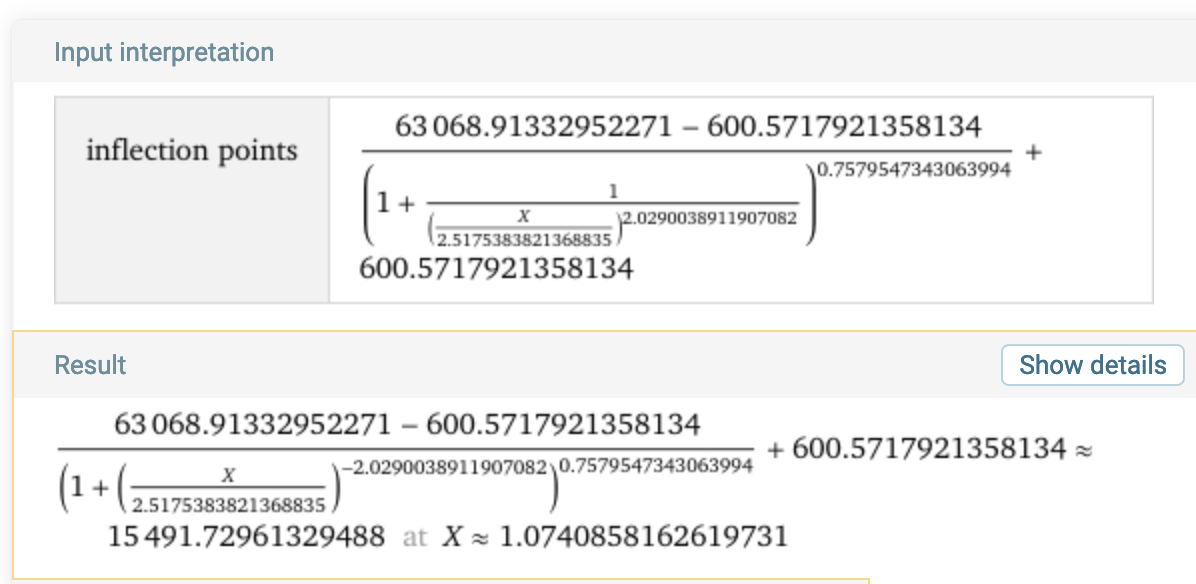

In [15]:
Kd_IGG = 10**1.0741
print(f"Kd_NHS = {Kd_IGG}")

Kd_NHS = 11.860418129480252


In [13]:
A_NHS = paramsNHS[0]
B_NHS = paramsNHS[1]
C_NHS = paramsNHS[2]
D_NHS = paramsNHS[3]
E_NHS = paramsNHS[4]

print(f"A_NHS = {A_NHS}")
print(f"B_NHS = {B_NHS}")
print(f"C_NHS = {C_NHS}")
print(f"D_NHS = {D_NHS}")
print(f"E_NHS = {E_NHS}")
print(f"R^2 for NHS Fit: {r2_NHS:.6f}")

A_NHS = 75103.17715485784
B_NHS = -2.3716851973039494
C_NHS = 2.9924000434555724
D_NHS = 696.5634301266927
E_NHS = 0.6097420917231297
R^2 for NHS Fit: 0.999995


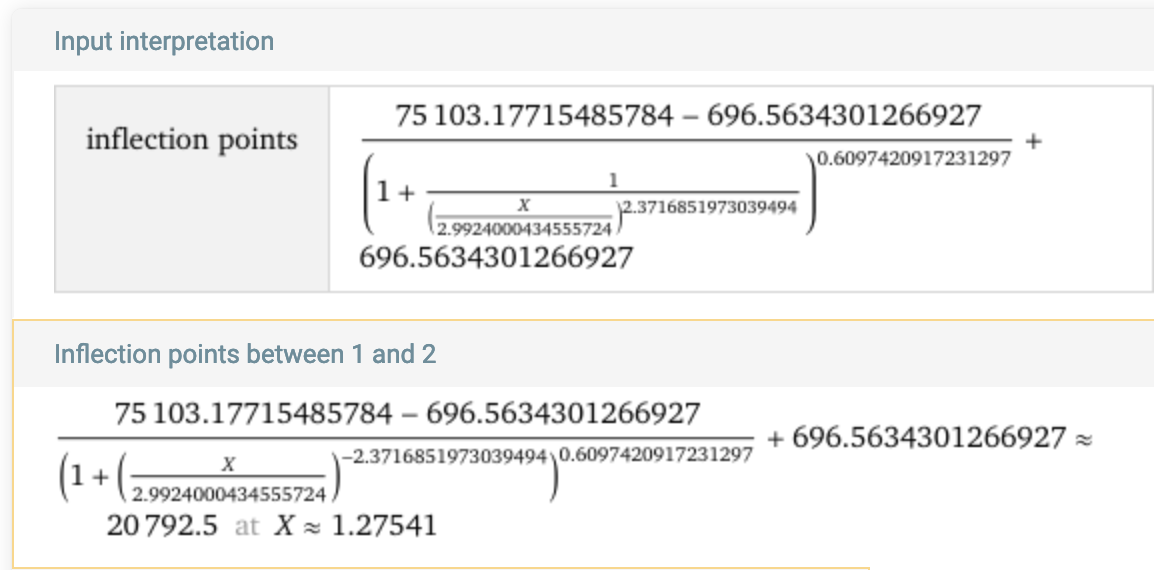

In [14]:
Kd_NHS = 10**1.27541
print(f"Kd_NHS = {Kd_NHS}")

Kd_NHS = 18.85428206702958
